In [2]:
import cv2
import json
import matplotlib .pyplot as plt
import numpy as np
import random 

In [3]:
cfg_path = 'models/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt'
weight_path = 'models/mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb'
classes_path = 'models/mscoco_labels.names'

In [4]:
with open(classes_path) as data:
    class_names = [line.strip() for line in data]

In [5]:
model = cv2.dnn.readNetFromTensorflow(weight_path, cfg_path)

In [6]:
img_path = 'src/images/bus_1.jpg'
img = cv2.imread(img_path)
height, width, channels = img.shape

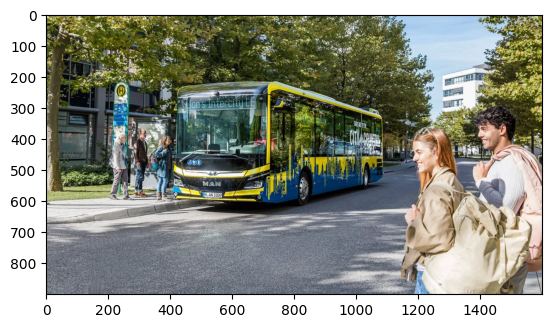

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
blob = cv2.dnn.blobFromImage(img)

In [9]:
def get_predictions(model, blob):
    model.setInput(blob)
    boxes, masks = model.forward(['detection_out_final', 'detection_masks'])
    return boxes, masks

In [10]:
boxes, masks = get_predictions(model, blob)

In [11]:
canvas = np.zeros((height, width, channels))

In [12]:
for j in range(len(masks)):
    bbox = boxes[0, 0 , j]
    mask = masks[j]

    class_id = bbox[1]
    score = bbox[2]

In [13]:
threshold = 0.5

colours = [
    (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    for _ in range(len(class_names))
]

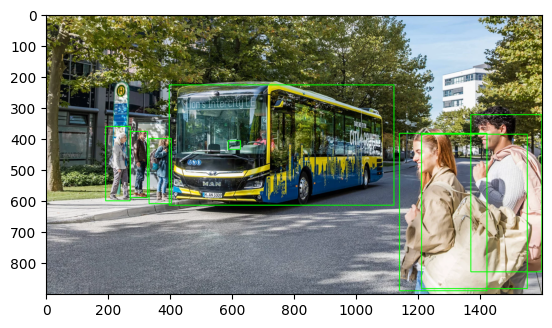

In [14]:
for j in range(len(masks)):
    bbox = boxes[0, 0 , j]
    mask = masks[j]

    class_label = bbox[1]
    score = bbox[2]
    
    if score > threshold:
        x1, y1, x2, y2 = int(bbox[3] * width), int(bbox[4] * height), int(bbox[5] * width), int(bbox[6] * height)

        output = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        
        mask = mask[int(class_label)]

In [15]:
for j in range(len(masks)):
    bbox = boxes[0, 0 , j]
    score = bbox[2]
    
    if score > threshold:
        class_label = bbox[1]
        mask = masks[j]
        
        x1, y1, x2, y2 = int(bbox[3] * width), int(bbox[4] * height), int(bbox[5] * width), int(bbox[6] * height)
        
        mask = mask[int(class_label)]
        mask = cv2.resize(mask, (x2-x1, y2-y1))

        _, mask = cv2.threshold(mask, 0.5, 1, cv2.THRESH_BINARY)
        

        for c in range (channels):
            canvas[y1:y2, x1:x2, c] = mask * colours[int(class_label)][c]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..243.0].


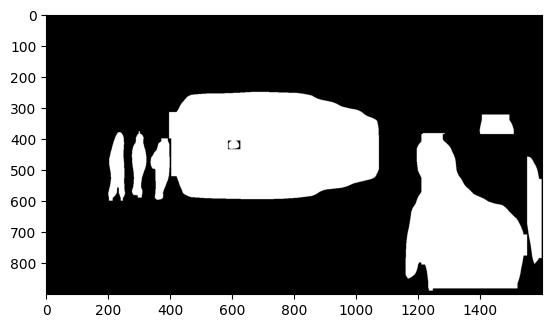

In [16]:
plt.imshow(canvas)

In [17]:
overlay = ((0.8 * canvas) + (0.2 * img)).astype('uint8')

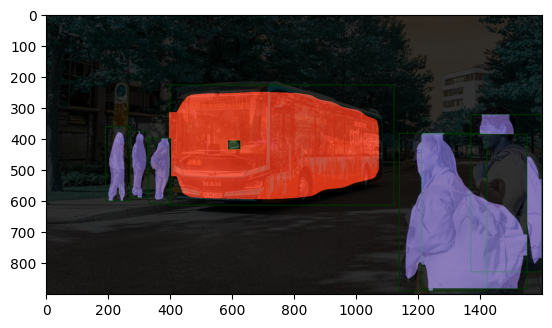

In [18]:
plt.imshow(overlay)